In [1]:
import torch
import random
from matplotlib import pyplot as plt
import numpy as np
from IPython import display

In [2]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.4
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels =  true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.normal(mean = 0, std = 0.01, size = labels.shape, dtype=torch.float32)

In [3]:
features[0], labels[0]

(tensor([-0.3597, -1.2042]), tensor(7.7565))

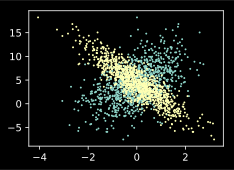

In [4]:
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 0].numpy(), labels.numpy(), 1);  # 加分号只显示图
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);  # 加分号只显示图

In [5]:
def data_iter(batch_size, features, labels):
    num_examples =  len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        #print(indices[i], indices[ min(i + batch_size, num_examples) ])
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples) ])
        yield features.index_select(0, j), labels.index_select(0, j)


In [6]:
batch_size = 10

for x, y in data_iter(batch_size, features, labels):
    print(x, y)
    break

tensor([[ 1.1395, -1.9207],
        [ 1.6990, -0.6231],
        [ 1.1288, -0.1039],
        [ 1.0179,  0.2098],
        [-0.3071, -0.6606],
        [ 0.2349, -0.3768],
        [-1.5253, -0.8515],
        [ 1.3297, -0.7295],
        [-1.0912,  0.7720],
        [ 1.1673,  0.8342]]) tensor([13.2215,  9.9079,  6.9955,  5.7267,  6.0425,  6.1564,  4.2488,  9.5420,
        -0.3863,  3.8967])


In [7]:
w = torch.normal(mean = 0, std = 0.01, size = (num_inputs, 1), dtype=torch.float32)
#w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [8]:
w.requires_grad_(requires_grad = True)
b.requires_grad_(requires_grad = True)
print(w)

tensor([[-0.0103],
        [ 0.0074]], requires_grad=True)


In [9]:
def linreg(x , w, b):
    #print(x.shape, w.shape, b.shape)
    return x.mm(w) + b

In [10]:
def squared_loss(y_hat, y):
    #print(y_hat.shape, y_hat.shape)  
    #print(y.shape, y_hat.shape)
    return (y_hat - y.view(y_hat.size())) ** 2 / 2
    #return (y_hat - y) ** 2 / 2

In [11]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [12]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for x, y in data_iter(batch_size, features, labels):
        l = loss(net(x, w, b), y)
        #print(w)
        l.backward(torch.ones_like(l))
        sgd([w, b], lr, batch_size)
    
        w.grad.data.zero_()
        b.grad.data.zero_()
        #break

    train_l = loss(net(features, w, b), labels)
    #break
    print('epoch %d, loss %f, %f' % (epoch + 1, train_l.mean(), train_l.mean().item() ))

print(w, b)

epoch 1, loss 0.043797, 0.043797
epoch 2, loss 0.000168, 0.000168
epoch 3, loss 0.000053, 0.000053
tensor([[ 1.9996],
        [-3.3997]], requires_grad=True) tensor([4.3991], requires_grad=True)
